In [17]:
%load_ext autoreload
%autoreload 2

import pandas as pd # For Variable inspector

import torch
import os
from h36m_dataset import H36M_Dataset
from extra_dataset import extra_Dataset
from torch.utils.data import DataLoader
import torch.optim as optim
import numpy as np
import argparse
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load datasets

In [18]:
dataset_h36m_train = H36M_Dataset('', 10, 10, 1, split=0)
dataset_h36m_test = H36M_Dataset('', 10, 10, 1, split=1)
dataset_extra = extra_Dataset('', 10, 10, 1)

Reading subject 1, action walking, subaction 1
Reading subject 1, action walking, subaction 2
Reading subject 1, action eating, subaction 1
Reading subject 1, action eating, subaction 2
Reading subject 1, action smoking, subaction 1
Reading subject 1, action smoking, subaction 2
Reading subject 1, action discussion, subaction 1
Reading subject 1, action discussion, subaction 2
Reading subject 1, action directions, subaction 1
Reading subject 1, action directions, subaction 2
Reading subject 1, action greeting, subaction 1
Reading subject 1, action greeting, subaction 2
Reading subject 1, action phoning, subaction 1
Reading subject 1, action phoning, subaction 2
Reading subject 1, action posing, subaction 1
Reading subject 1, action posing, subaction 2
Reading subject 1, action purchases, subaction 1
Reading subject 1, action purchases, subaction 2
Reading subject 1, action sitting, subaction 1
Reading subject 1, action sitting, subaction 2
Reading subject 1, action sittingdown, subacti

In [19]:
#10 frames for training, 10 for testing in each 17 joints 3d poses
print(dataset_h36m_train[0].shape)
print(dataset_h36m_test[0].shape)
print(dataset_extra[0].shape)

(20, 51)
(20, 51)
(20, 51)


In [20]:
BATCH_SIZE = 32
train_loader = DataLoader(dataset_h36m_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(dataset_h36m_test, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
extra_loader = DataLoader(dataset_extra, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)

In [21]:
data = next(iter(train_loader)) 
print(data.shape)

torch.Size([32, 20, 51])


In [27]:


from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from IPython import display
import time
%matplotlib ipympl

def BatchVisualization(batch):
    batch = batch.numpy()
    
    for batch_member in batch:
        #input_frames, output_frames = np.array_split(batch_member, 2)
        #input_coordinates = input_frames.reshape(10, 17, 3)
        #output_coordinates = output_frames.reshape(10, 17, 3)
        
        fig = plt.figure(figsize = (10, 7))
        ax = plt.axes(projection ="3d")
            
        for frame in batch_member:
            coordinates = frame.reshape(frame.shape[0]/3, 3)
            x = coordinates[:, 0]
            y = coordinates[:, 1]
            z = coordinates[:, 2]
            
            ax.cla()
            ax.scatter(x, y, z, color = "green")
            #plt.title("simple 3D scatter plot")
            
            plt.draw()
            plt.pause(0.5)

            plt.show()

def SequenceVisualization(sequence):
    sequence = sequence.numpy()
    fig = plt.figure(figsize = (15, 10))
    ax = plt.axes(projection ="3d")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlabel("z")
    #ax.set_xlim(-1, 1)
    #ax.set_ylim(-1, 1)
    #ax.set_zlim(-1, 1)

    skeleton = None
    for frame in sequence:
        coordinates = frame.reshape(17, 3)
        xs = coordinates[:, 0]
        ys = coordinates[:, 1]
        zs = coordinates[:, 2]
        
        
        ax.cla()
        #ax.clear()
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlabel("z")

        #skeleton = ax.scatter(xs, ys, zs, color = "green")
        #ax.set_xlim(-1, 1)
        #ax.set_ylim(-1, 1)
        #ax.set_zlim(-1, 1)
        #plt.title("simple 3D scatter plot")

        #marker_style.update(markeredgecolor="none", markersize=15)
        
        for i, (x, y, z) in enumerate(zip(xs, ys, zs)):
            #print(i, x, y, z)
            ax.scatter(x, y, z, color = "green", marker=r"$ {} $".format(i), s=150)
        
        #plt.draw()
        plt.pause(0.2)

        #fig.canvas.draw()

        #plt.show()

        display.display(plt.gcf())
        display.clear_output(wait=True)
        #time.sleep(0.2)

def FrameVisualization(frame):
    frame = frame.numpy()
    
    fig = plt.figure(figsize = (15, 10))
    ax = plt.axes(projection ="3d")
    ax.set_aspect('equal', adjustable='box')
    plt.xlabel("x")
    plt.ylabel("z")
    plt.xlabel("y")

    coordinates = frame.reshape(17, 3)
    
    xs = coordinates[:, 0]
    ys = coordinates[:, 1]
    zs = coordinates[:, 2]

    for i, (x, y, z) in enumerate(zip(xs, ys, zs)):
        ax.scatter(x, z, y, color = "green", marker=r"$ {} $".format(i), s=150)
    


In [28]:
print(data[0, 0].shape)

torch.Size([51])


In [29]:
#BatchVisualization(data)
#SequenceVisualization(data[0])

#SequenceVisualization(data[0])

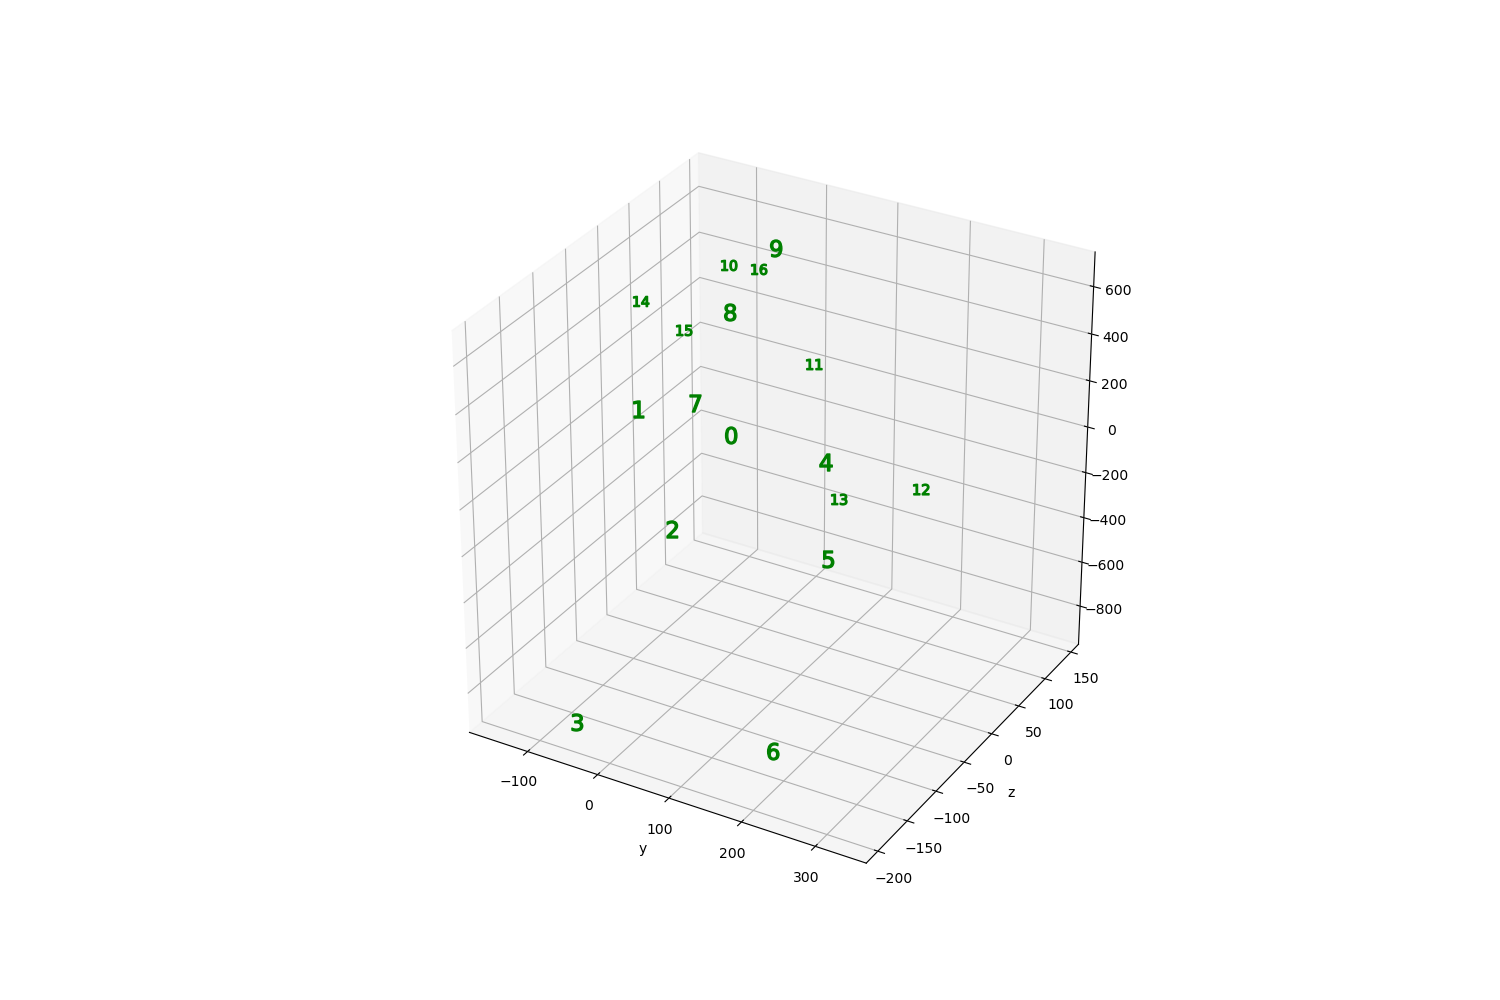

In [30]:
FrameVisualization(data[1,0])

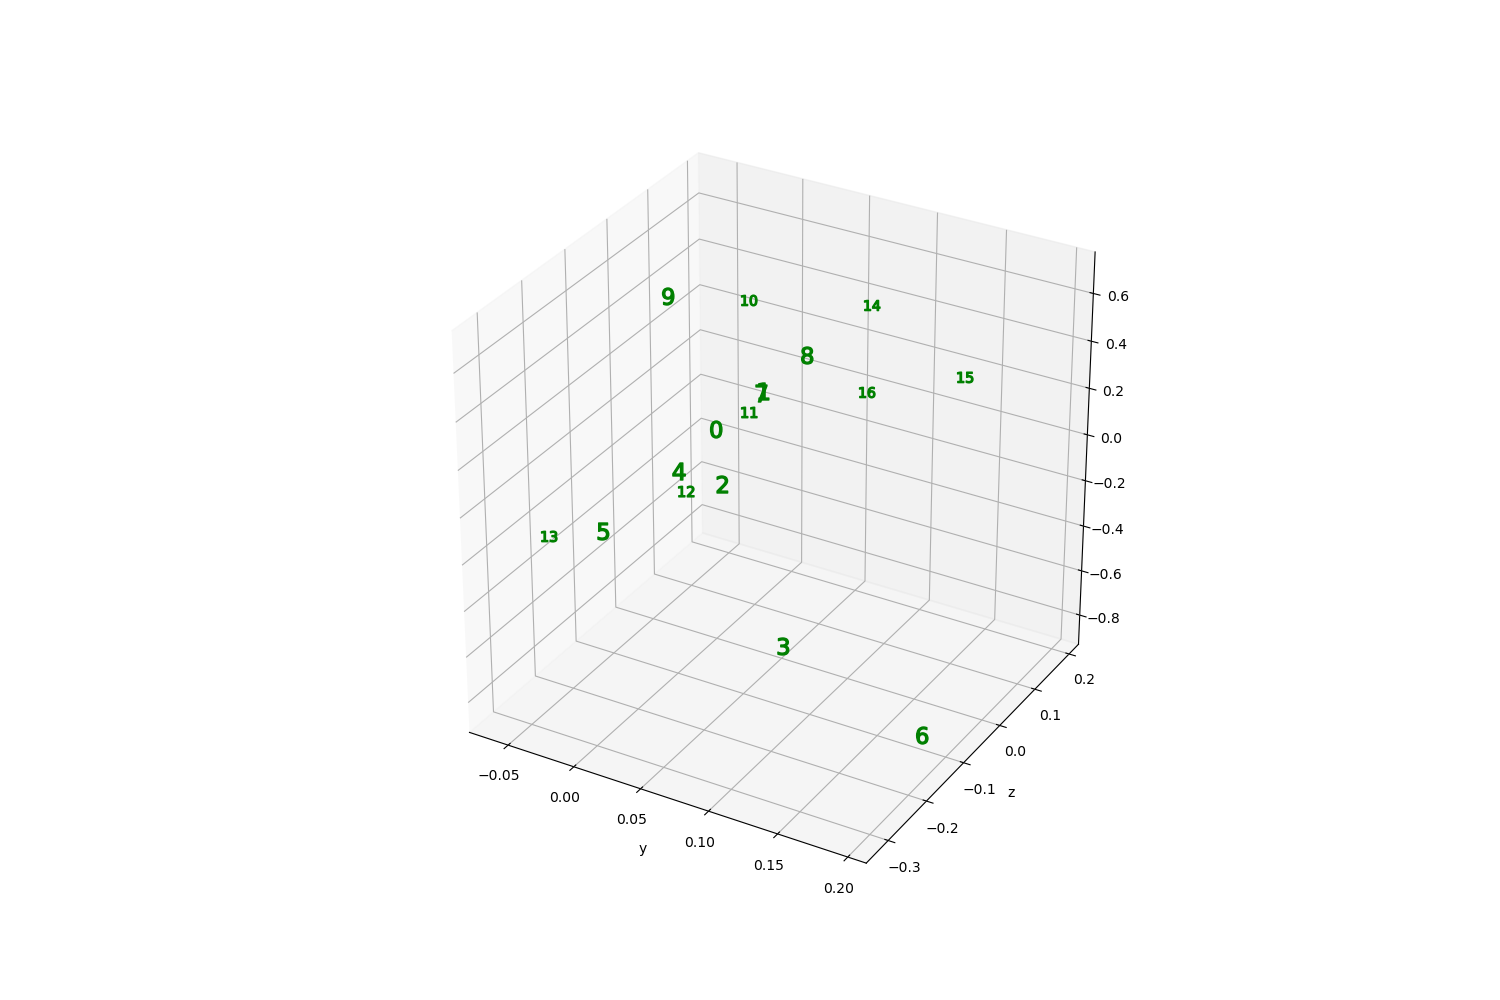

In [32]:
extra_data = next(iter(extra_loader)) 
FrameVisualization(extra_data[0,0])